## Fashion Classification - Neural Network
Task:

Write a neural network to classify different type of cloths.

Assume the dataset to be clean and ready for usage.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import sklearn
from sklearn import linear_model
import matplotlib.pyplot as plt
import pickle
from matplotlib import style

import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np

Training data set shape: (60000, 28, 28).
Testing data set shape: (10000, 28, 28).
Example the a pixel values rows: 
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.         0.         0.05098039 0.28627451 0.
  0.         0.00392157 0.01568627 0.         0.         0.
  0.         0.00392157 0.00392157 0.        ]].

There is a total of 10 different classes of clothing.


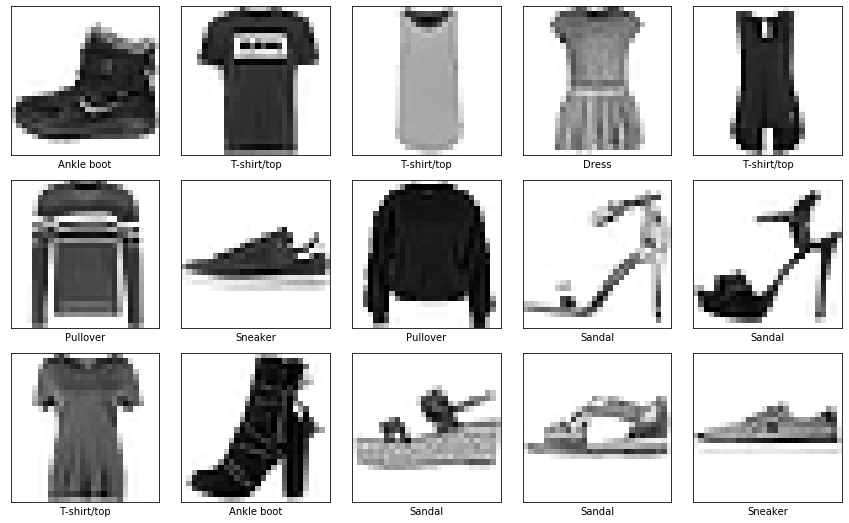

In [17]:
fashion_data = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_data.load_data()
train_images = train_images/255
test_images = test_images/255

print("Training data set shape: {}.".format(train_images.shape))
print("Testing data set shape: {}.".format(test_images.shape))
print("Example the a pixel values rows: \n{}.".format(train_images[0][3:4]))

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print("\nThere is a total of {} different classes of clothing.".format(len(class_names)))

plt.figure(figsize=(12,12))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.tight_layout()
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

As we can see, we have $60,000$ images to train on and $10,000$ images to test on. An image consist of $28x28$ pixels, each with a designated value between $0$ (white) and $1$ (black).

10000/10000 [==============================] - 0s 24us/sample - loss: 0.4389 - accuracy: 0.8437
Epoch 1/2
60000/60000 [==============================] - 2s 38us/sample - loss: 0.4981 - accuracy: 0.8250
Epoch 2/2
10000/10000 [==============================] - 0s 22us/sample - loss: 0.4112 - accuracy: 0.8517
Epoch 1/3
60000/60000 [==============================] - 2s 36us/sample - loss: 0.5040 - accuracy: 0.8232
Epoch 2/3
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3777 - accuracy: 0.8646
Epoch 3/3
10000/10000 [==============================] - 0s 22us/sample - loss: 0.3877 - accuracy: 0.8590
Epoch 1/4
60000/60000 [==============================] - 2s 38us/sample - loss: 0.5007 - accuracy: 0.8241
Epoch 2/4
60000/60000 [==============================] - 2s 35us/sample - loss: 0.3741 - accuracy: 0.8665
Epoch 3/4
60000/60000 [==============================] - 2s 37us/sample - loss: 0.3366 - accuracy: 0.8766
Epoch 4/4
10000/10000 [==============================] -

60000/60000 [==============================] - 2s 35us/sample - loss: 0.3736 - accuracy: 0.8645
Epoch 3/12
60000/60000 [==============================] - 2s 32us/sample - loss: 0.3341 - accuracy: 0.8773
Epoch 4/12
60000/60000 [==============================] - 2s 33us/sample - loss: 0.3114 - accuracy: 0.8859
Epoch 5/12
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2915 - accuracy: 0.8935
Epoch 6/12
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2781 - accuracy: 0.8968
Epoch 7/12
60000/60000 [==============================] - 2s 31us/sample - loss: 0.2644 - accuracy: 0.9021
Epoch 8/12
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2551 - accuracy: 0.9043
Epoch 9/12
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2440 - accuracy: 0.9090
Epoch 10/12
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2347 - accuracy: 0.9116
Epoch 11/12
60000/60000 [======================

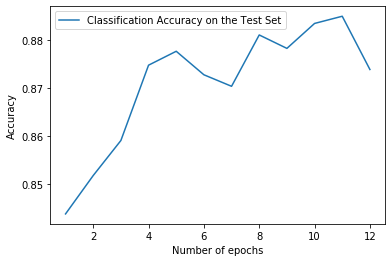

In [32]:
testing_acc_list = []
neural_network_list = []
def neural_network(epochs):
    neural_network = keras.Sequential([
                                    keras.layers.Flatten(input_shape=(28,28)),
                                    keras.layers.Dense(128, activation='relu'),
                                    keras.layers.Dense(10, activation='softmax')
                                    ])

    neural_network.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    neural_network.fit(train_images, train_labels, epochs=epochs)
    test_loss, test_acc = neural_network.evaluate(test_images, test_labels)
    neural_network_list.append(neural_network)
    testing_acc_list.append(test_acc)

epoch_settings = range(1,13)
for i in epoch_settings:
    neural_network(i)

plt.plot(epoch_settings, testing_acc_list, label='Classification Accuracy on the Test Set')
plt.ylabel('Accuracy')
plt.xlabel('Number of epochs')
plt.legend()
figname = 'nn_epoch_test.png'
plt.savefig(figname)

Classification Accuracy on the Test Set: 0.8848999738693237


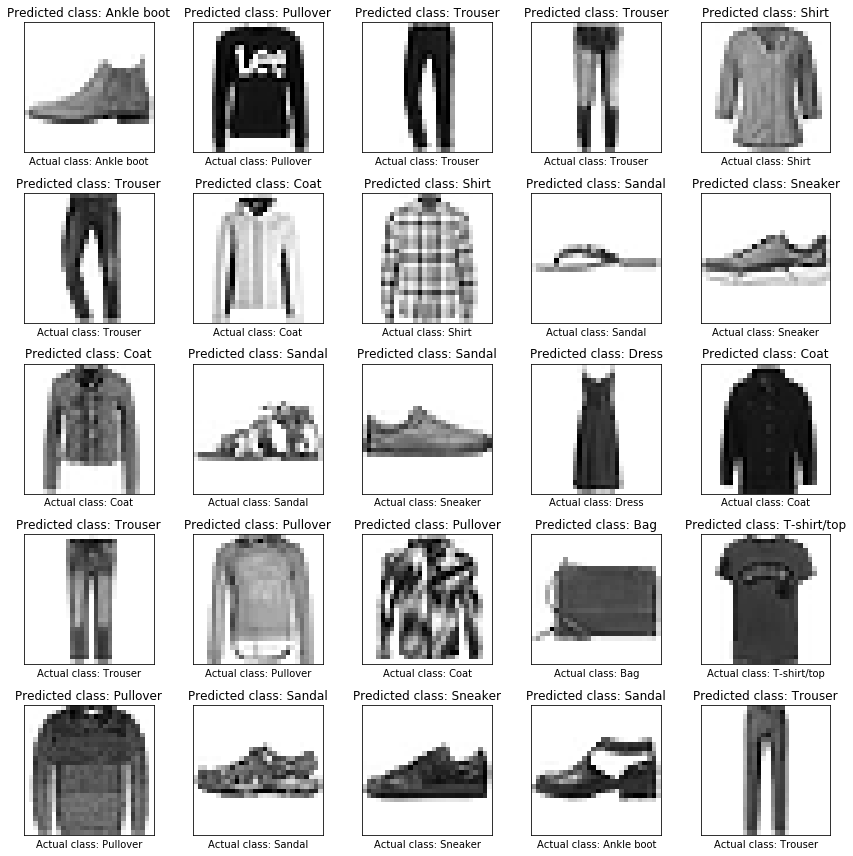

In [41]:
max_test_acc_index = testing_acc_list.index(max(testing_acc_list))
print("Classification Accuracy on the Test Set: {}".format(testing_acc_list[max_test_acc_index]))

y_predicted_proba = neural_network_list[max_test_acc_index].predict(test_images)
y_predicted_class = [class_names[np.argmax(list)] for list in y_predicted_proba]

plt.figure(figsize=(12,12))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.tight_layout()
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel("Actual class: {}".format(class_names[test_labels[i]]))
    plt.title("Predicted class: {}".format(y_predicted_class[i]))
plt.show()

#acc_NN = neural_network_list[max_test_acc_index].score(X_test, y_test)